In [1]:
from datasets import load_dataset

In [2]:
!rm -r /data_vault/hexai/ArtEmis-FinalSplits/metadata.csv

rm: cannot remove '/data_vault/hexai/ArtEmis-FinalSplits/metadata.csv': No such file or directory


In [3]:
dataset = load_dataset("imagefolder", data_dir="/data_vault/hexai/ArtEmis-FinalSplits/")

label2id = {label: i for i, label in enumerate(dataset["train"].features["label"].names)}
id2label = {i: label for label, i in label2id.items()}

Resolving data files:   0%|          | 0/13311 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1903 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/3806 [00:00<?, ?it/s]

In [4]:
from torchvision.transforms import Resize, Compose

_transforms = Compose([Resize((224,224))])

def transforms(examples):
    examples["pixel_values"] = [_transforms(img.convert("RGB")) for img in examples["image"]]
    del examples["image"]
    return examples

In [5]:
dataset = dataset.with_transform(transforms)

In [6]:
import numpy as np

In [7]:
images_flattened = []
image_labels = []

for batch in dataset["train"]:
    img = np.array(batch["pixel_values"])
    label = batch["label"]

    images_flattened.append(img.flatten())
    image_labels.append(label)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression(max_iter=20000)
lr.fit(images_flattened, image_labels)

LogisticRegression(max_iter=20000)

In [10]:
images_flattened_valid = []
image_labels_valid = []

for batch in dataset["validation"]:
    img = np.array(batch["pixel_values"])
    label = batch["label"]

    images_flattened_valid.append(img.flatten())
    image_labels_valid.append(label)

In [11]:
preds = lr.predict(images_flattened_valid)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, labels):
    """
    Plots the confusion matrix (thanks to Dr. Na-Rae Han).
    """
    sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="Reds", 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()


In [14]:
print(classification_report(preds, image_labels_valid))

              precision    recall  f1-score   support

           0       0.21      0.22      0.21       329
           1       0.21      0.21      0.21       338
           2       0.05      0.04      0.04       122
           3       0.17      0.22      0.20       297
           4       0.13      0.12      0.13       237
           5       0.14      0.14      0.14       261
           6       0.24      0.18      0.21       319

    accuracy                           0.18      1903
   macro avg       0.16      0.16      0.16      1903
weighted avg       0.18      0.18      0.18      1903



In [15]:
images_flattened_test = []
image_labels_test = []

for batch in dataset["test"]:
    img = np.array(batch["pixel_values"])
    label = batch["label"]

    images_flattened_test.append(img.flatten())
    image_labels_test.append(label)

In [16]:
preds = lr.predict(images_flattened_test)

In [17]:
print(classification_report(image_labels_test, preds))

              precision    recall  f1-score   support

           0       0.19      0.18      0.18       708
           1       0.21      0.21      0.21       680
           2       0.05      0.05      0.05       208
           3       0.18      0.15      0.16       759
           4       0.12      0.11      0.11       454
           5       0.17      0.19      0.18       516
           6       0.15      0.19      0.17       481

    accuracy                           0.17      3806
   macro avg       0.15      0.15      0.15      3806
weighted avg       0.17      0.17      0.17      3806



In [18]:
cm = confusion_matrix(image_labels_test, preds)

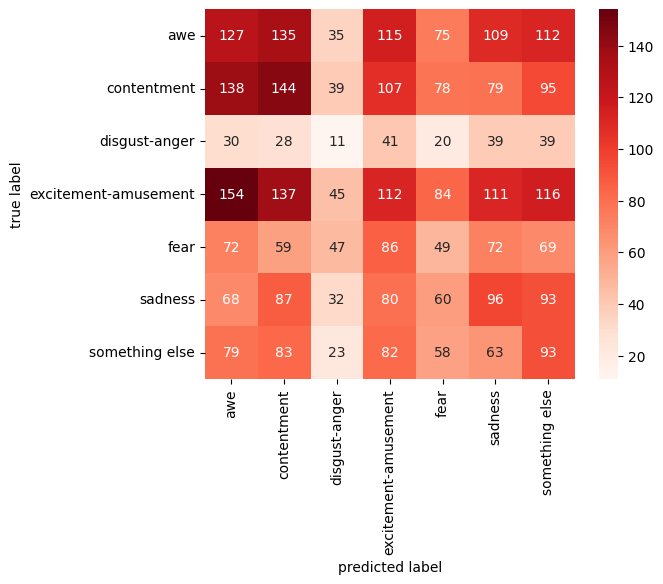

In [19]:
plot_confusion_matrix(cm, dataset["train"].features["label"].names)

In [23]:
np.sum(cm[1:, 0])/3806

0.1421439831844456

In [24]:
from imblearn.metrics import specificity_score

In [27]:
1 - specificity_score(image_labels_test, preds, average="macro")

0.14088858340405253

In [28]:
from sklearn.svm import LinearSVC

In [29]:
svc = LinearSVC()

In [ ]:
svc.fit(images_flattened, image_labels)

/home/ngl18/anaconda3/envs/lora/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
preds_svc = svc.predict(images_flattened_test)